# Citrus Leaves Classification Model

In [1]:
import tensorflow as tf
import glob
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.optimizers import Adam

import random
from keras.utils import Sequence
from tensorflow import keras
import matplotlib.pyplot as plt
import sys
from PIL import Image

sys.modules['Image'] = Image
print(Image.__file__)
from sklearn.preprocessing import LabelEncoder

import cv2
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D,BatchNormalization,AveragePooling2D
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


C:\Users\lwand\.conda\envs\tensorflow\lib\site-packages\PIL\Image.py


In [2]:
%matplotlib inline

## Image Data Preprocessing 

Retrieving image dataset using ImageDataGenerator from local dir and spliting training and validation data 

In [9]:
shoe_data_dir= "C:/Users/lwand/OneDrive/Desktop/Big Data/Shoes/Train/"
classes=["boot", "casual","high heel","male formal","non shoe","sneaker"]
shoe_data_dir

'C:/Users/lwand/OneDrive/Desktop/Big Data/Shoes/Train/'

In [19]:
datagen = ImageDataGenerator(validation_split=0.30, rescale =1./255)


train_data_gen = datagen.flow_from_directory(
    shoe_data_dir, target_size=(200,200),
    #class_mode='sparse',
    classes = classes,
    subset='training',
    shuffle = True,
)

val_data_gen = datagen.flow_from_directory(
    shoe_data_dir,target_size=(200,200),
    #class_mode='sparse',
    classes = classes,
    subset='validation',
    shuffle = True,
)

train_data_gen

Found 1362 images belonging to 6 classes.
Found 578 images belonging to 6 classes.


### Displaying Leaf Images

Keras functions to plot images

In [20]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(20,20))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [21]:
CLASS_NAMES = np.array(classes)
CLASS_NAMES

array(['boot', 'casual', 'high heel', 'male formal', 'non shoe',
       'sneaker'], dtype='<U11')

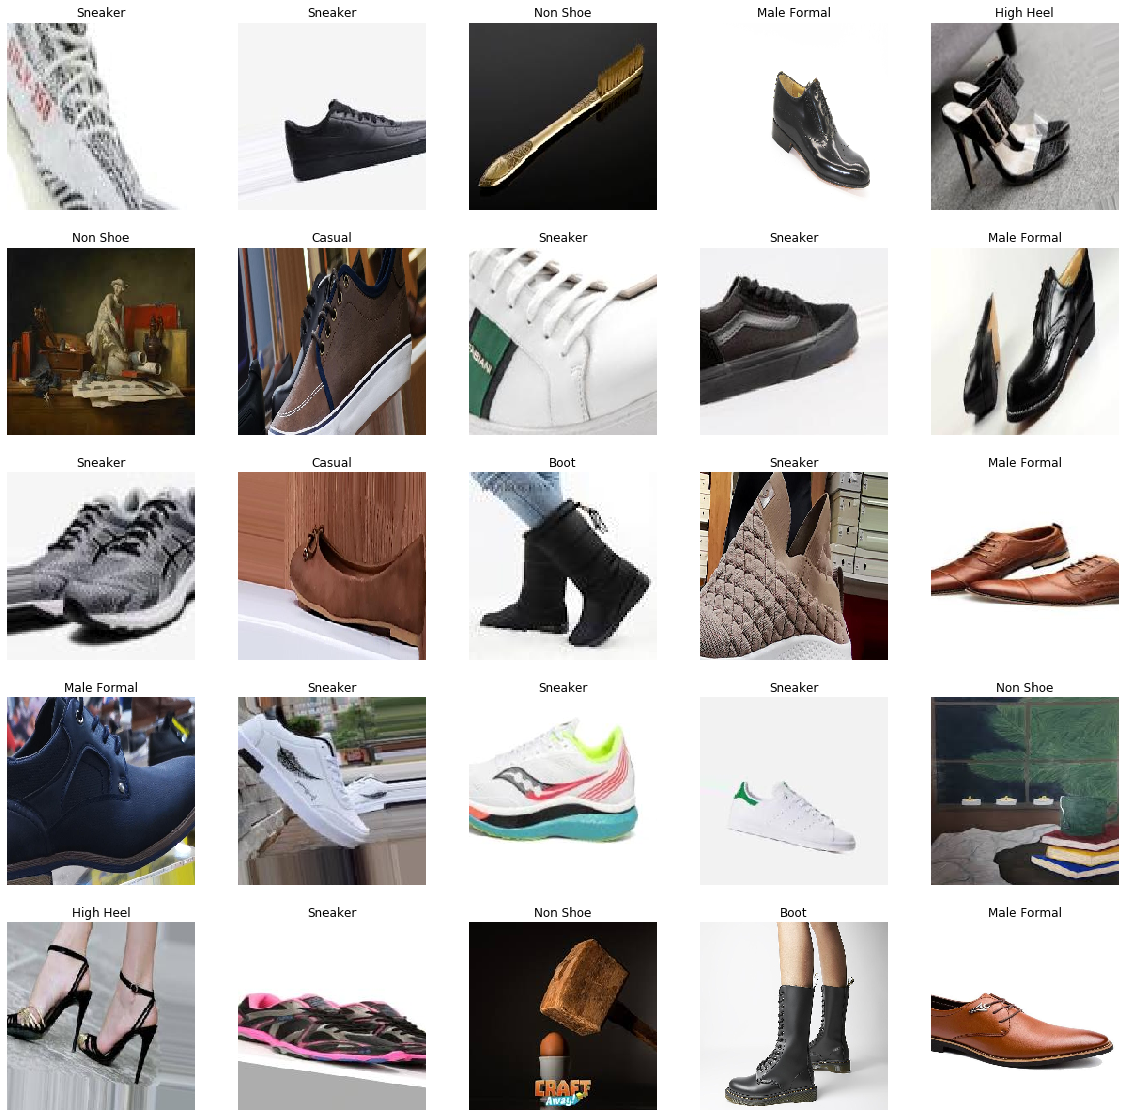

In [22]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

## Developing CNN Model

In [23]:
model = Sequential([  
    Dense(16,activation='relu', input_shape=(200,200,3)),
    Convolution2D(32, kernel_size=(3,3), padding='same', 
                  kernel_regularizer=regularizers.l2(0.01),
                  activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),


    Convolution2D(64, kernel_size=(3,3), padding='same', 
                  kernel_regularizer=keras.regularizers.l2(0.01),
                  activation='relu'),
    MaxPooling2D(),
    
    Flatten(),

    Dropout(0.2),

    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200, 200, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160000)           

In [24]:
from keras.utils.vis_utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Display model architecture

## Training CNN model

In [25]:
history = model.fit(train_data_gen, epochs=80, 
                    validation_data = val_data_gen, verbose = 1)

Epoch 1/80
43/43 [==============================] - 179s 4s/step - loss: 5.9875 - accuracy: 0.2269 - val_loss: 3.9371 - val_accuracy: 0.2526
Epoch 2/80
43/43 [==============================] - 169s 4s/step - loss: 3.4556 - accuracy: 0.3069 - val_loss: 3.1427 - val_accuracy: 0.3460
Epoch 3/80
43/43 [==============================] - 182s 4s/step - loss: 3.0210 - accuracy: 0.3289 - val_loss: 3.0206 - val_accuracy: 0.3512
Epoch 4/80
43/43 [==============================] - 200s 5s/step - loss: 2.7127 - accuracy: 0.3465 - val_loss: 1.9495 - val_accuracy: 0.3529
Epoch 5/80
43/43 [==============================] - 160s 4s/step - loss: 2.4613 - accuracy: 0.3458 - val_loss: 2.9391 - val_accuracy: 0.3754
Epoch 6/80
43/43 [==============================] - 169s 4s/step - loss: 2.3988 - accuracy: 0.3465 - val_loss: 2.3508 - val_accuracy: 0.3997
Epoch 7/80
43/43 [==============================] - 184s 4s/step - loss: 2.2774 - accuracy: 0.3671 - val_loss: 2.2113 - val_accuracy: 0.4204
Epoch 8/80
43

Epoch 59/80
43/43 [==============================] - 152s 4s/step - loss: 1.6286 - accuracy: 0.5404 - val_loss: 1.5316 - val_accuracy: 0.4896
Epoch 60/80
43/43 [==============================] - 152s 4s/step - loss: 1.5626 - accuracy: 0.5514 - val_loss: 1.4665 - val_accuracy: 0.4879
Epoch 61/80
43/43 [==============================] - 159s 4s/step - loss: 1.5162 - accuracy: 0.5771 - val_loss: 1.3836 - val_accuracy: 0.4862
Epoch 62/80
43/43 [==============================] - 154s 4s/step - loss: 1.6006 - accuracy: 0.5382 - val_loss: 2.1706 - val_accuracy: 0.4325
Epoch 63/80
43/43 [==============================] - 154s 4s/step - loss: 1.5382 - accuracy: 0.5551 - val_loss: 2.7683 - val_accuracy: 0.4740
Epoch 64/80
43/43 [==============================] - 153s 4s/step - loss: 1.6046 - accuracy: 0.5367 - val_loss: 1.7289 - val_accuracy: 0.4412
Epoch 65/80
43/43 [==============================] - 153s 4s/step - loss: 1.5531 - accuracy: 0.5683 - val_loss: 1.7689 - val_accuracy: 0.3927
Epoch 

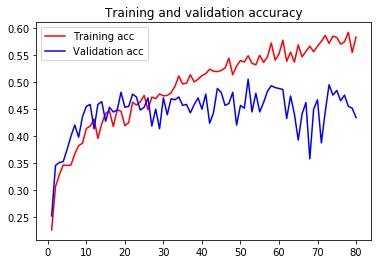

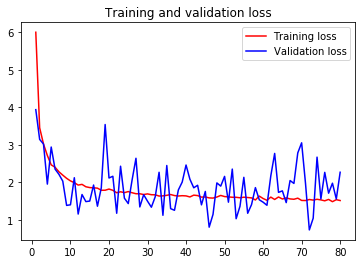

In [26]:

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
#plt.ylim(0.0, 1.01)

plt.figure(facecolor="white")

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Saving model on current directory

In [68]:
model.save("Shoes.h5")

Retreiving training data

In [27]:
training_dir = "C:/Users/lwand/OneDrive/Desktop/Big Data/Shoes/Test/"

In [28]:
test_gen = ImageDataGenerator(rescale =1./255)


test_data = test_gen.flow_from_directory(
    training_dir, target_size=(200,200),
    classes = classes, shuffle=False,
)

Found 432 images belonging to 6 classes.


Function for plotting confusion matrix

In [29]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix for CNN citrus disease detection model',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Making predictions on test data

In [30]:
filenames = test_data.filenames
nb_samples = len(filenames)

predictions = model.predict_generator(test_data)


In [31]:
y_true = test_data.classes
y_pred = np.argmax(predictions,axis=1)

In [32]:
cm = confusion_matrix(y_true,y_pred)

Plotting confusion matrix

In [ ]:
plot_confusion_matrix(cm,classes=classes)

Confusion matrix, without normalization
[[ 58   4  11   6   5   2]
 [ 18  29   5   8   8  17]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  9   7   8   5 103  11]
 [ 14   8   9  15  18  54]]


In [47]:
score = model.evaluate(test_data, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 1.5097086429595947 / Test accuracy: 0.5578703880310059


In [5]:
from tensorflow.keras.models import Model, load_model

model = load_model("Shoes.h5")